In [3]:
# Import libraries
import pandas as pd
import matplotlib as plt

# Load csv file
df = pd.read_csv("raw data.csv")

In [4]:
#Converting to correct type
# Converting to correct type
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')
df['Net Amount'] = pd.to_numeric(df['Net Amount'], errors='coerce')
df['Reinsurance'] = pd.to_numeric(df['Reinsurance'], errors='coerce')

date_cols = ['D.O.L', 'D.O.I', 'D.O.P', 'Start', 'Expiry']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

today = pd.Timestamp.today()

In [5]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Claim No           4604 non-null   object        
 1   Policy No          4604 non-null   object        
 2   Underwriting Year  4603 non-null   float64       
 3   Insured            4604 non-null   object        
 4   Intermediary       4604 non-null   object        
 5   Class              4604 non-null   object        
 6   Class Code         4604 non-null   int64         
 7   Sub Class          4604 non-null   object        
 8   Sub Class Code     4604 non-null   int64         
 9   Nature Of Loss     4604 non-null   object        
 10  D.O.L              4604 non-null   datetime64[ns]
 11  D.O.I              4604 non-null   datetime64[ns]
 12  D.O.P              4604 non-null   datetime64[ns]
 13  Start              4604 non-null   datetime64[ns]
 14  Expiry  

In [6]:
#Summary Statistics
df.describe()

,Underwriting Year,Class Code,Sub Class Code,D.O.L,D.O.I,D.O.P,Start,Expiry,Indemnity Amount,Recoveries Amount,Handling Expense,Gross Amount,Reinsurance,Net Amount
count,4603.000000,4604.000000,4604.000000,4604,4604,4604,4604,4604,4.604000e+03,4.604000e+03,4.604000e+03,4.572000e+03,4.604000e+03,4.604000e+03
mean,2023.439279,64.397698,644.750000,2024-04-15 22:48:41.285838592,2024-05-09 13:26:38.262380544,2025-04-04 05:40:17.723718656,2023-11-10 08:33:53.014769664,2024-10-05 17:15:16.420503808,1.581895e+05,-8.174389e+03,6.597306e+04,1.602462e+05,7.592460e+04,1.400636e+05
min,2006.000000,2.000000,20.000000,2006-12-14 00:00:00,2007-01-02 00:00:00,2025-01-02 00:00:00,2006-01-19 00:00:00,2007-01-18 00:00:00,-3.000000e+06,-7.957784e+06,-3.546990e+07,-3.546990e+07,-1.800000e+05,-3.546990e+07
25%,2023.000000,70.000000,700.000000,2024-04-22 00:00:00,2024-05-05 18:00:00,2025-02-19 00:00:00,2023-10-26 18:00:00,2024-10-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,6.830000e+03,0.000000e+00,6.650000e+03
50%,2024.000000,70.000000,700.000000,2024-10-22 00:00:00,2024-10-31 00:00:00,2025-04-09 00:00:00,2024-04-02 00:00:00,2025-03-03 00:00:00,0.000000e+00,0.000000e+00,6.380000e+03,2.784150e+04,0.000000e+00,2.605000e+04
75%,2024.000000,70.000000,700.000000,2025-01-05 00:00:00,2025-01-15 00:00:00,2025-05-09 00:00:00,2024-09-04 00:00:00,2025-07-18 00:00:00,1.600000e+04,0.000000e+00,3.170000e+04,1.399320e+05,0.000000e+00,1.312900e+05
max,2025.000000,80.000000,813.000000,2025-06-23 00:00:00,2025-06-27 00:00:00,2025-06-30 00:00:00,2025-05-07 00:00:00,2027-07-31 00:00:00,7.000000e+07,5.000000e+05,3.546990e+07,3.546990e+07,6.600000e+07,3.546990e+07
std,1.723233,21.747453,217.393622,NaN,NaN,NaN,NaN,NaN,1.558912e+06,1.282141e+05,7.921606e+05,9.554040e+05,1.463593e+06,8.355824e+05


In [7]:
#Size of Dataset
df.shape

(4604, 21)

In [8]:
#Num of duplicated rows
df.duplicated().sum()

np.int64(0)

In [9]:
#Data Cleaning

#Completeness check
for col in ['Claim No', 'Policy No', 'Class']:
    df[f"{col} Check"] = ["OK" if x else "CHECK" for x in df[col].notna()]
    
#Date reasonability
date_ok = []

for i, row in df.iterrows():
    ok = True

    if pd.notna(row['D.O.L']) and pd.notna(row['Start']) and pd.notna(row['Expiry']):
        if not (row['Start'] <= row['D.O.L'] <= row['Expiry']):
            ok = False

    if pd.notna(row['D.O.P']) and pd.notna(row['D.O.L']):
        if row['D.O.P'] < row['D.O.L']:
            ok = False

    for date_col in ['D.O.L', 'D.O.I', 'D.O.P', 'Start', 'Expiry']:
        if pd.notna(row[date_col]) and row[date_col] > today:
            ok = False
    date_ok.append("OK" if ok else "CHECK")

df['Date Reasonability'] = date_ok

#Gross check
df['Gross=Net+Reinsurance'] = [
    "OK" if g == (n + r) else "CHECK"
    for g, n, r in zip(df['Gross Amount'], df['Net Amount'], df['Reinsurance'])
]

In [10]:
#converting to csv
output_file = "claims_data_with_checks.csv"
df.to_csv(output_file, index=False)

<Axes: ylabel='count'>

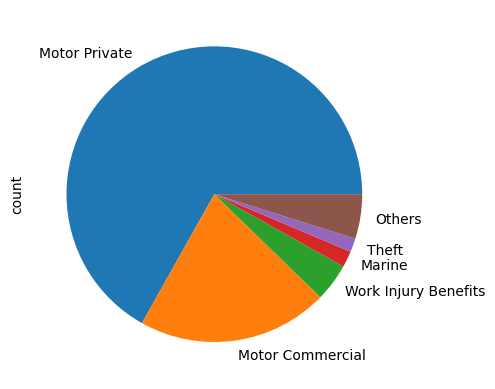

In [11]:
# Visualization

class_counts = df['Class'].value_counts()

# Big 5 classes + others
top_classes = class_counts.head(5)
top_classes['Others'] = class_counts[5:].sum()

top_classes.plot.pie()




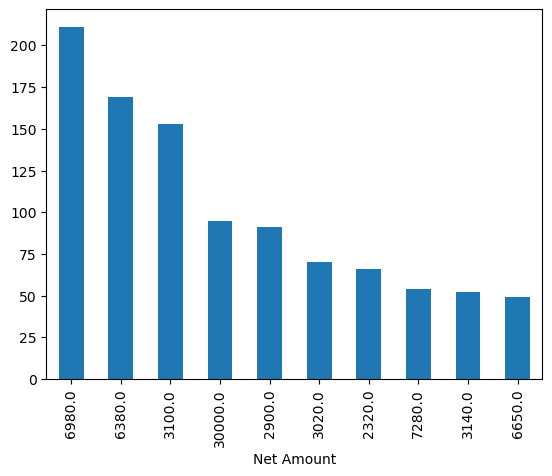

In [12]:
#Net amount
net_amount = df['Net Amount'].value_counts().head(10)
ax = net_amount.plot.bar()

